In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# All imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from IPython.display import display
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score

from sklearn.svm import OneClassSVM
from numpy import where
import operator

In [4]:
# Read in data
df = pd.read_csv('online_shoppers_intention.csv')
print(df)
display(df.head(5))
print(type(df))

       Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000 

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

<class 'pandas.core.frame.DataFrame'>


<ipython-input-3-1db20124da75>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmin=-1, vmax=1, center= 0, annot = True, cmap = 'RdBu', ax=ax)


<Axes: >

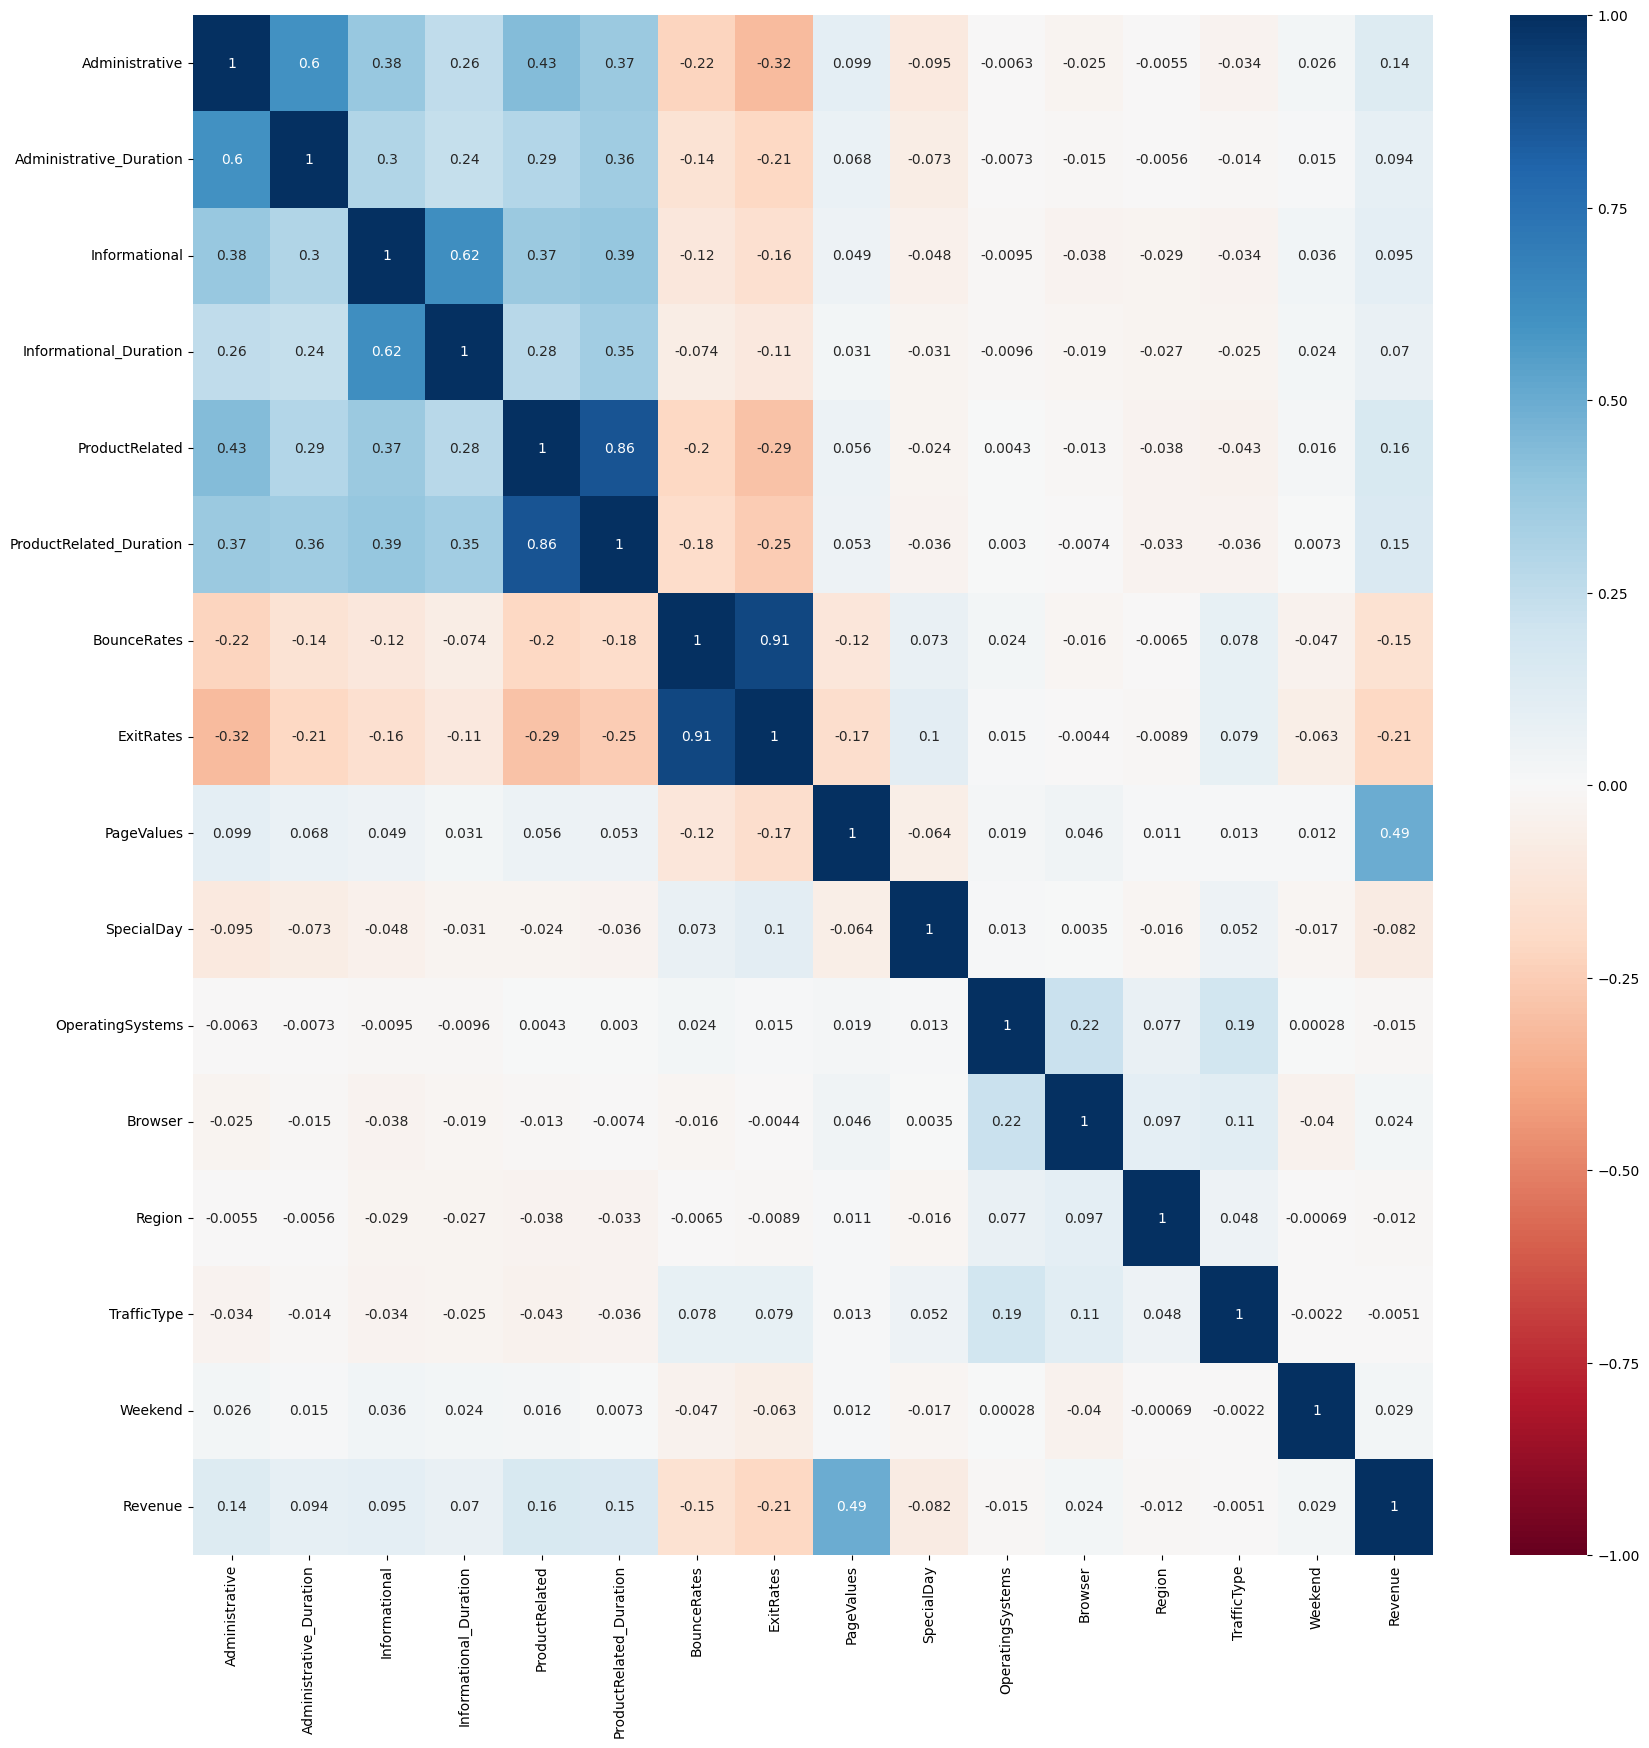

In [ ]:
# Display heatmap
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), vmin=-1, vmax=1, center= 0, annot = True, cmap = 'RdBu', ax=ax)

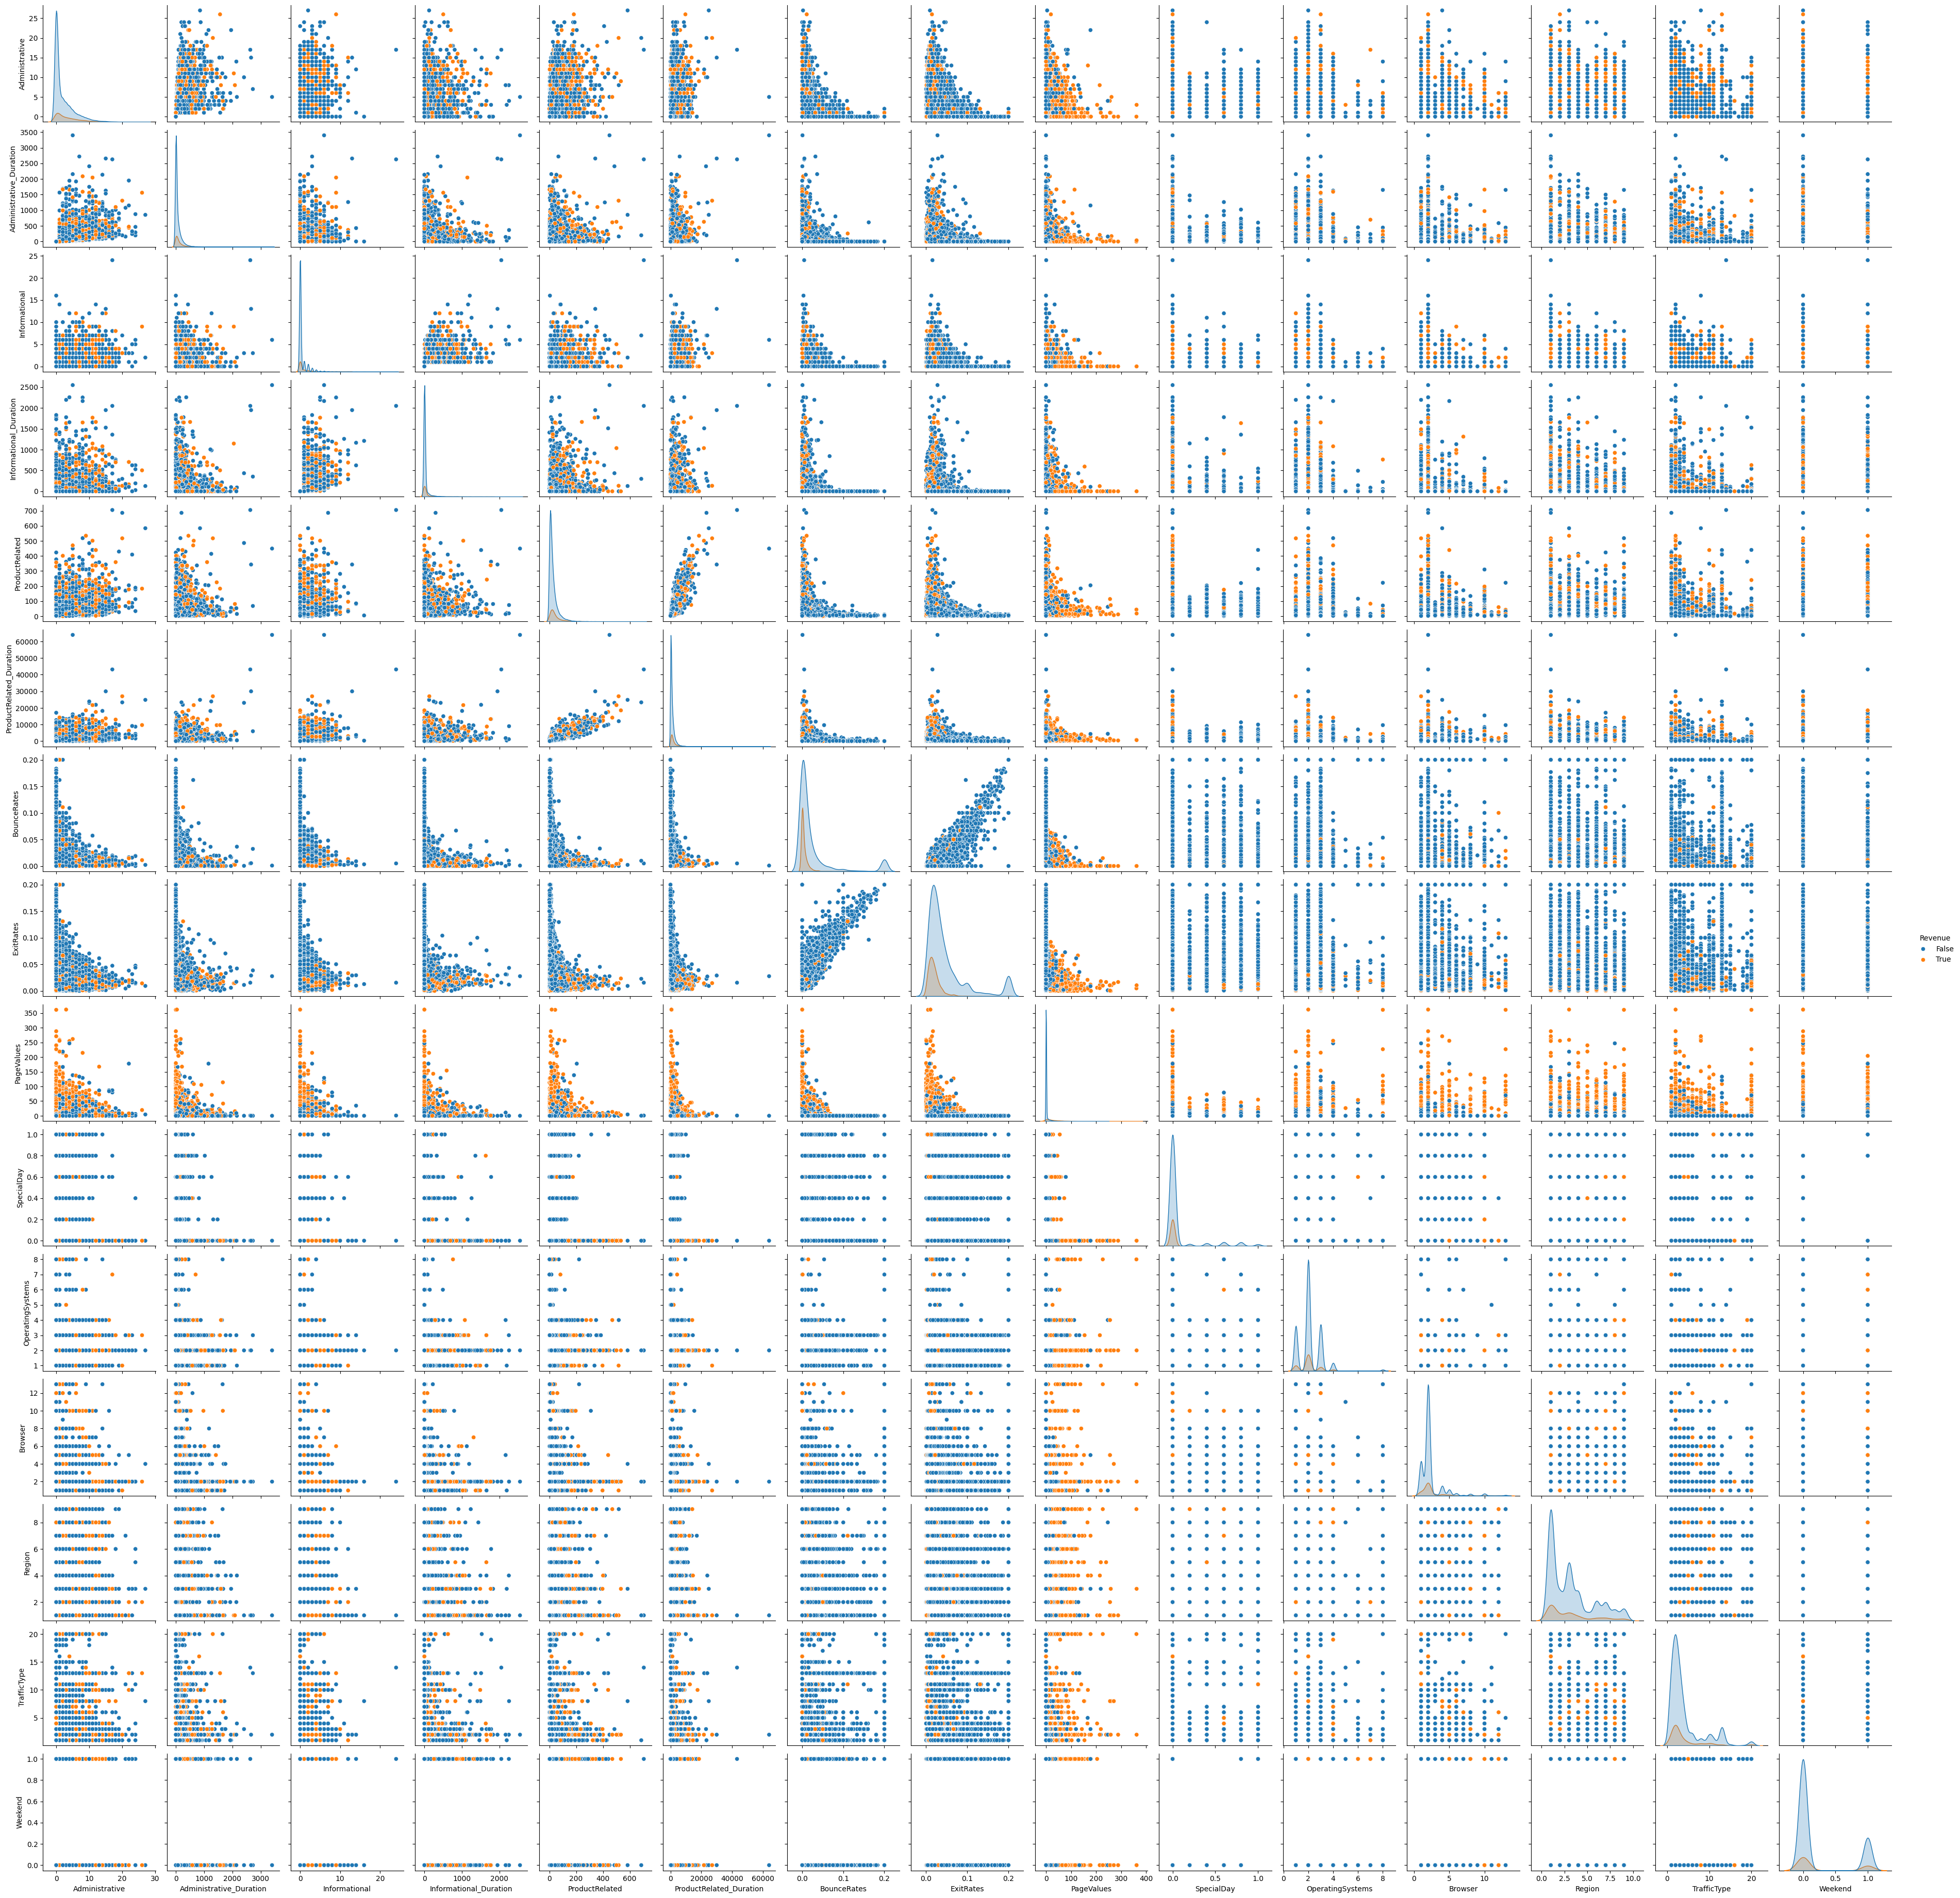

In [ ]:
# Seaborn solution
_ = sns.pairplot(df, hue='Revenue', diag_kind='kde')
# Can observe distribution of variables and see if there are outliers from variablexvariable graphs

Text(24.944444444444443, 0.5, 'Ratio of Data')

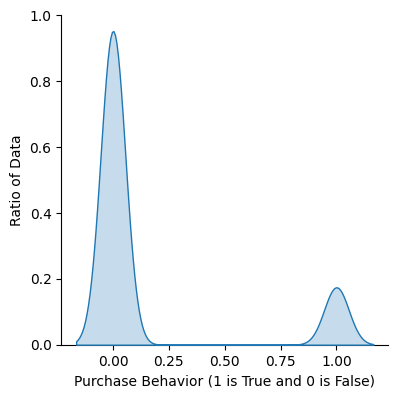

In [5]:
# Seaborn solution to printing out distribution of the Revenue data
revenue_plot = sns.pairplot(df['Revenue'].to_frame(), diag_kind='kde', height = 4)
revenue_plot.axes[0, 0].xaxis.set_label_text('Purchase Behavior (1 is True and 0 is False)')
revenue_plot.axes[0, 0].yaxis.set_label_text('Ratio of Data')
# Data is pretty skewed to towards data that has no purchase from online user

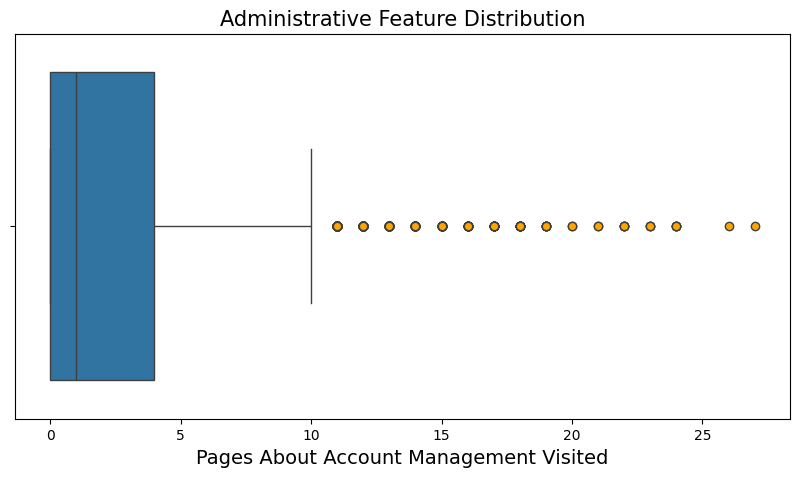

In [6]:
# Administrative feature distribution
fig = plt.figure(figsize=(10,5))
sns.boxplot(x = df['Administrative'], flierprops = dict(markerfacecolor = 'orange', marker = 'o'))
plt.title('Administrative Feature Distribution', fontsize=15)
plt.xlabel('Pages About Account Management Visited', fontsize=14)
plt.show()

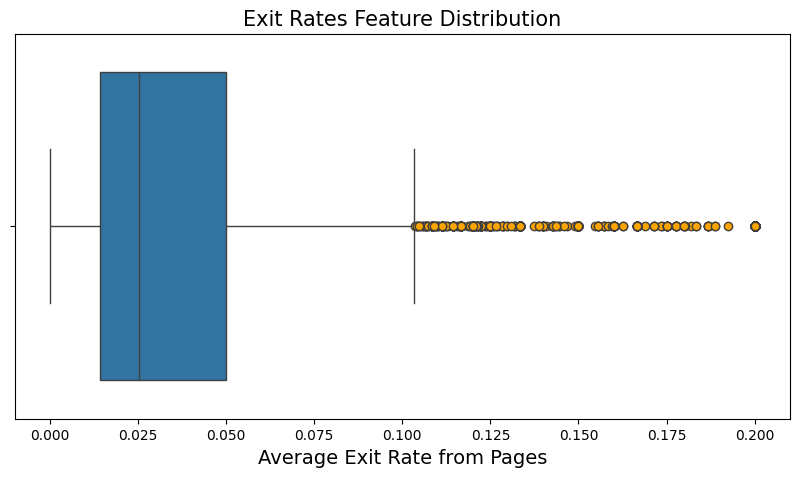

In [8]:
# Exit Rates feature distribution
fig = plt.figure(figsize=(10,5))
sns.boxplot(x = df['ExitRates'], flierprops = dict(markerfacecolor = 'orange', marker = 'o'))
plt.title('Exit Rates Feature Distribution', fontsize=15)
plt.xlabel('Average Exit Rate from Pages', fontsize=14)
plt.show()

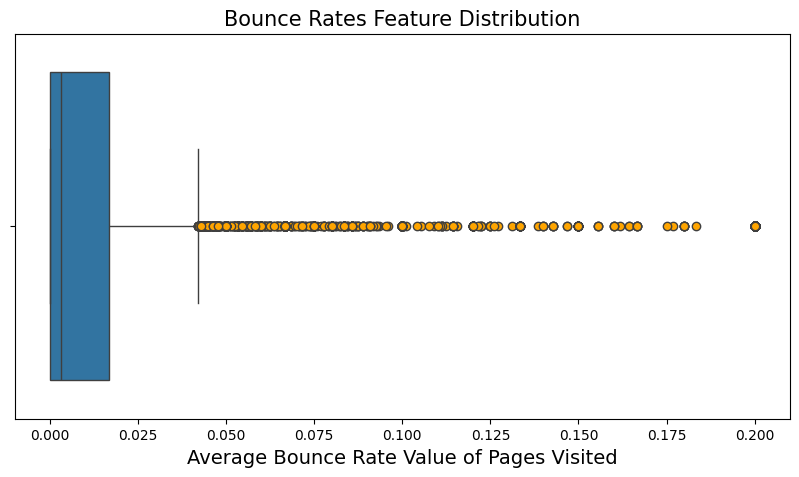

In [9]:
# Bounce Rates feature distribution
fig = plt.figure(figsize=(10,5))
sns.boxplot(x = df['BounceRates'], flierprops = dict(markerfacecolor = 'orange', marker = 'o'))
plt.title('Bounce Rates Feature Distribution', fontsize=15)
plt.xlabel('Average Bounce Rate Value of Pages Visited', fontsize=14)
plt.show()